# Analysed By: Sourabh Suman

## Task 4: Exploratory Data Analysis - Terrorism

## Problem Statement:

- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
- As a security/defense analyst, try to find out the hot zone of terrorism.
- What all security issues and insights you can derive by EDA?

#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Loading The Datasets
#### Dataset : globalterrorismdb_0718dist.csv [https://bit.ly/2TK5Xn5]

In [3]:
terrorism=pd.read_csv("Terrordata.csv",encoding='latin1')
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
#shape of data
terrorism.shape

(181691, 135)

In [5]:
#List of columns in the dataframe
terrorism.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
# Modifying our current dataframe by Renaming some columns name to get better format:
terrorism.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

In [7]:
#keep 18 columns
data = terrorism[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

In [8]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [9]:
# Filling NA/NaN Values
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)
# Add column 'Casualties' by adding 'kill' and 'wound'
data['Casualities'] = data['kill'] + data['Wound']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attacktype   181691 non-null  object 
 10  kill         181691 non-null  float64
 11  Wound        181691 non-null  float64
 12  target1      181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Targettype   181691 non-null  object 
 16  Weapon       181691 non-null  object 
 17  motive       50561 non-null   object 
 18  Casualities  181691 non-

In [11]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


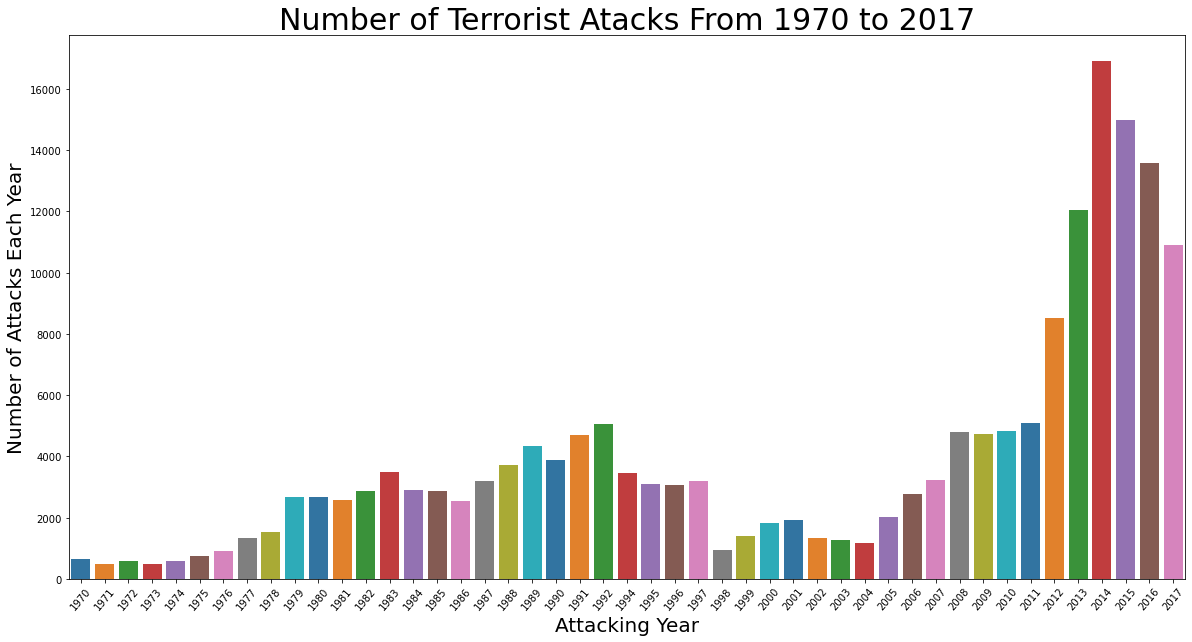

In [12]:
#Plotting Number of terrorist attack vs years
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (20,10))
sns.barplot(x = year, y = years_count, palette = "tab10")
plt.xticks(rotation = 50)
plt.xlabel('Attacking Year',fontsize=20)
plt.ylabel('Number of Attacks Each Year',fontsize=20)
plt.title('Number of Terrorist Atacks From 1970 to 2017',fontsize=30)
plt.show()

This graph show the number of global terrorist attacks by year from 1970 to 2017. The number of attack increased significantly from 2011 to 2014. The year 2014 is unlucky year with nearly 17000 reported terrorist attacks.

### Types of attacks and damage

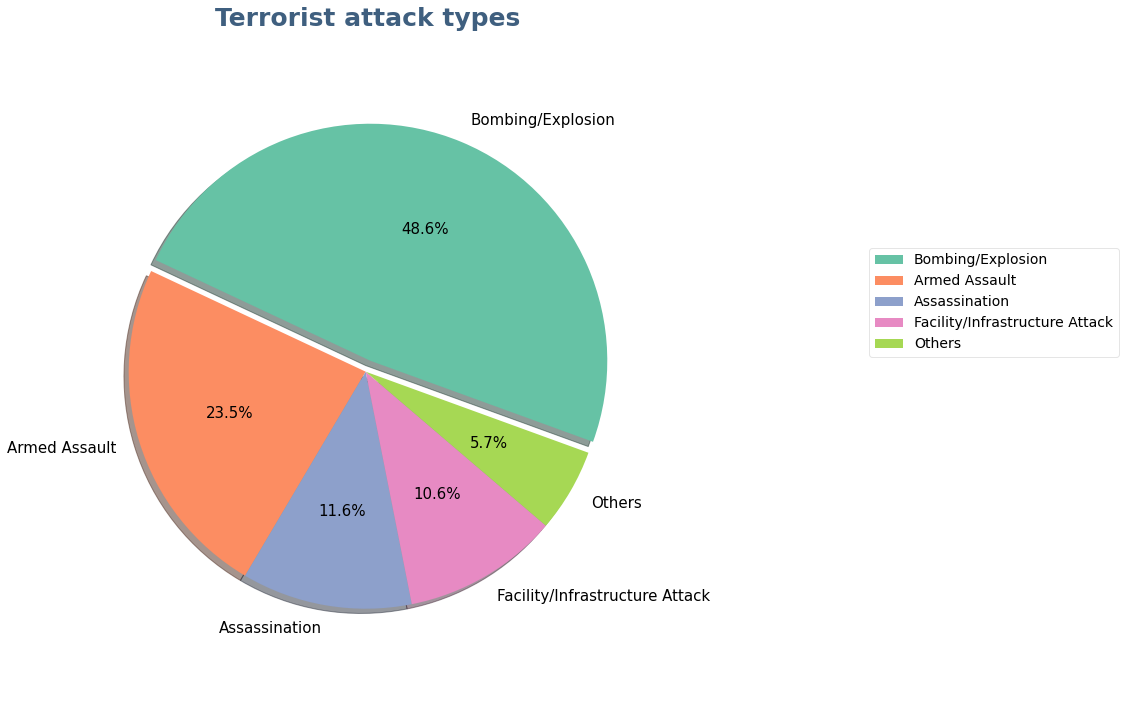

In [14]:
# List of filtered attack types
filtered_attack_types =data['Attacktype'].apply(lambda x: x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                                       'Facility/Infrastructure Attack'] else 'Others')

# count of distinct attack types
attack_type = filtered_attack_types.value_counts().tolist()

# Pie chart of Terrorist attack types
labels = ['Bombing/Explosion','Armed Assault','Assassination',
          'Facility/Infrastructure Attack','Others']

sizes = []

for i in attack_type:
    percent = i*100/len(data['Attacktype'])
    sizes.append(percent)

fig, ax = plt.subplots(figsize=(10,10))
patches, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle = -20, shadow = True,
        explode = (0.05, 0, 0, 0, 0),
        colors = sns.color_palette("Set2", 8)[:5]+[(0.5843137254901961, 0.6470588235294118, 0.6509803921568628)],
        textprops={'fontsize':15,'weight':'light','color':'k'})

ax.axis('equal')
plt.title('Terrorist attack types', fontsize= 25, pad= -70, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3]) #pad change the distance from title to graph
plt.tight_layout()
ax.legend(loc='lower right',framealpha = 0.5,bbox_to_anchor=(1.8,0.5,0.1,1), prop={'size': 14})
fig.show()

### Most attacked countries

In [15]:
# Most atacked countries
attack = data['Country'].value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

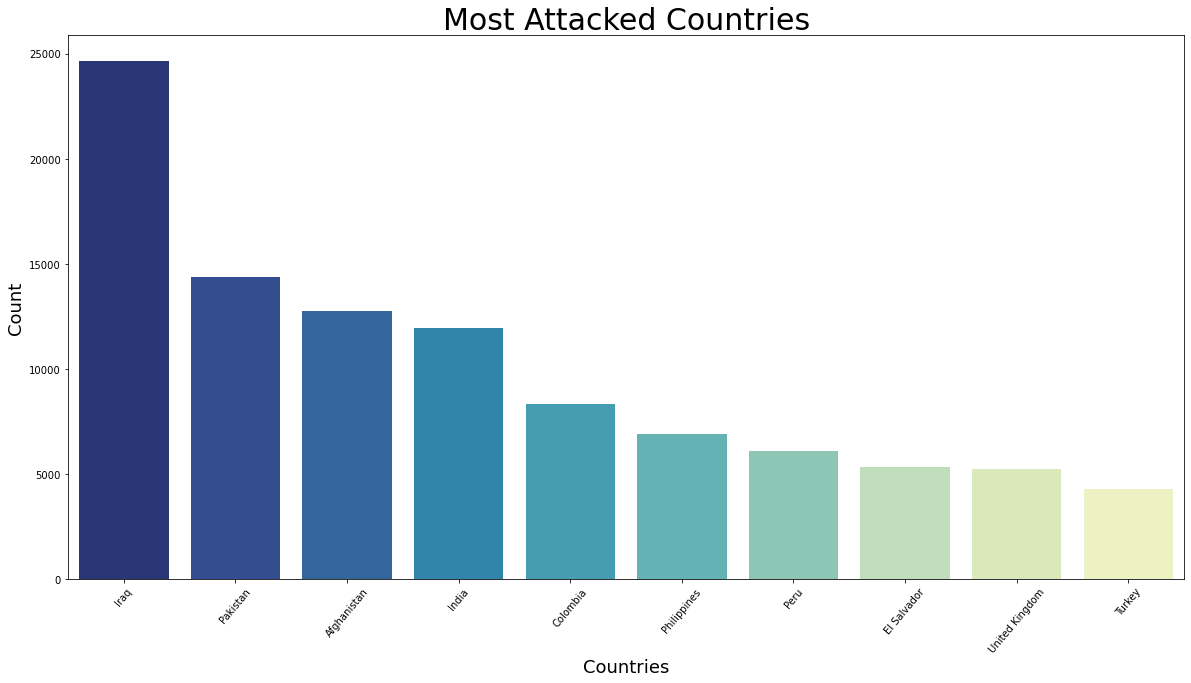

In [16]:
# Plotting the graph of most attacked countries
plt.subplots(figsize=(20,10))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlGnBu_r')
plt.title('Most Attacked Countries',fontsize=30)
plt.xlabel('Countries',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(rotation = 50)
plt.show()

### Most Attacked Cities

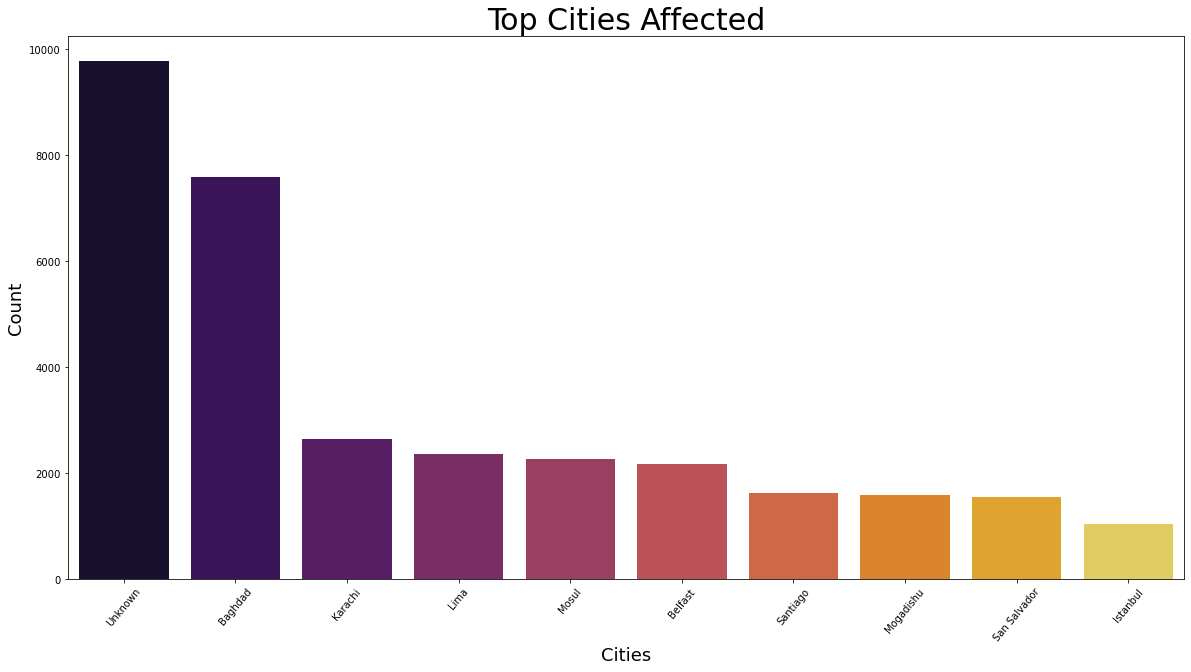

In [17]:
city = data['City'].value_counts()
city.drop('Unknown')
plt.subplots(figsize=(20,10))
sns.barplot(city[:10].index,city[:10].values,palette='inferno')
plt.title('Top Cities Affected',fontsize=30)
plt.xlabel('Cities',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(rotation = 50)
plt.show()



### Medium of attack

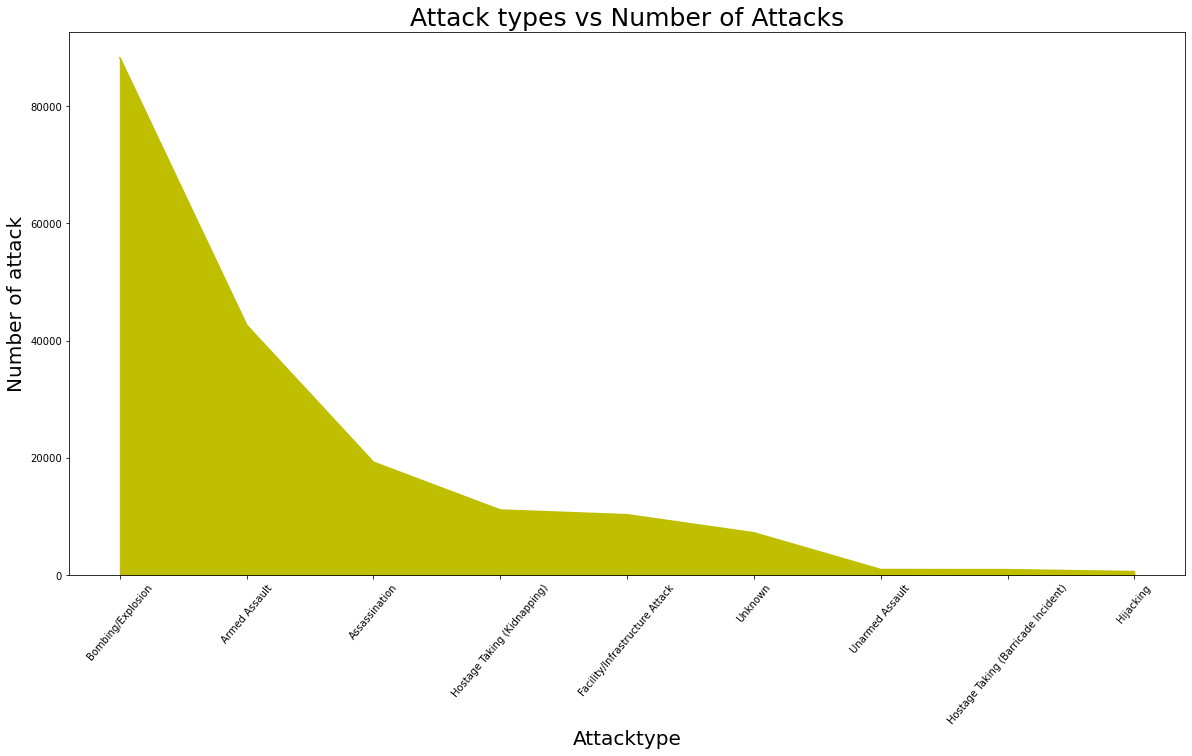

In [18]:
# Attack Types
data['Attacktype'].value_counts().plot(kind='area',figsize=(20,10),color='y')
plt.xticks(rotation = 50)
plt.xlabel("Attacktype",fontsize=20)
plt.ylabel("Number of attack",fontsize=20)
plt.title("Attack types vs Number of Attacks",fontsize=25)
plt.show()

### Target by Terrorists

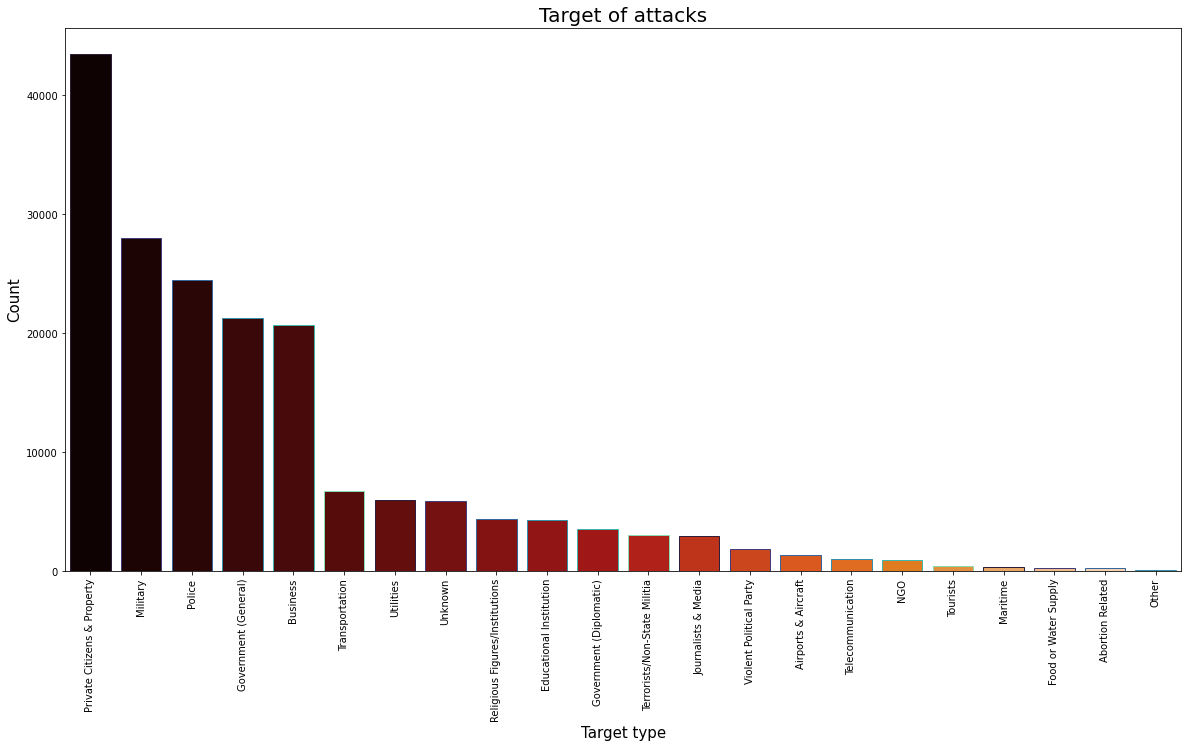

In [19]:
# Plotting Target vs Count
plt.subplots(figsize=(20,10))
sns.countplot(data["Targettype"],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette("mako"));
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Target of attacks",fontsize=20)
plt.show()

### Most Active Terrorist Groups

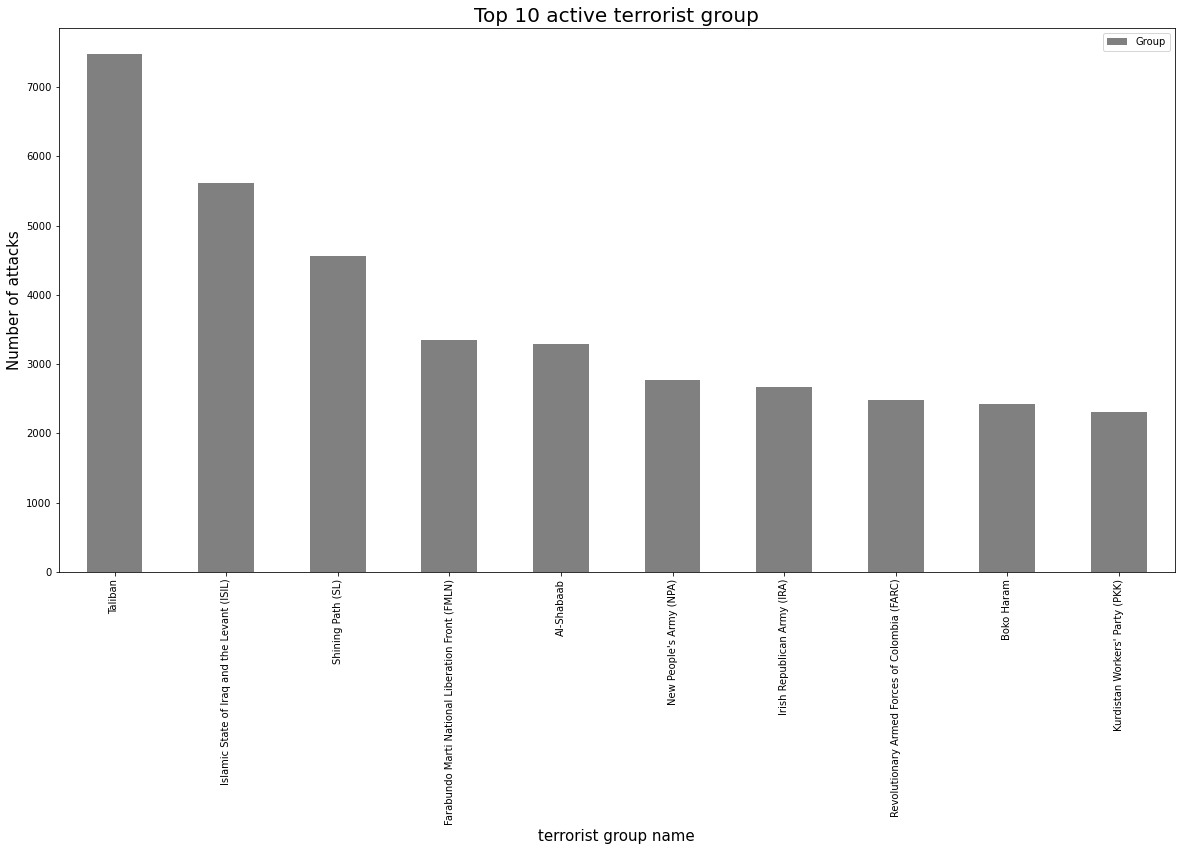

In [20]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='grey',figsize=(20,10))
plt.title("Top 10 active terrorist group",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.show()

### Most Brutal attacks

In [21]:
# Places where most number of fatalities reported by attacks

df=data[['Group','Country','kill']]
df=df.groupby(['Group','Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df

,Group,Country,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,31058.0
1,Taliban,Afghanistan,29269.0
2,Boko Haram,Nigeria,16917.0
3,Shining Path (SL),Peru,11595.0
4,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,10928.0
5,Al-Shabaab,Somalia,8176.0
6,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
7,Islamic State of Iraq and the Levant (ISIL),Syria,6883.0
8,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
9,Tehrik-i-Taliban Pakistan (TTP),Pakistan,6014.0


### Number of people killed in terrorist attacks

In [22]:
# Total loss of lives
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [23]:
# kill type
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


In [24]:
# Country wise kill
countryKill = data.pivot_table(columns='Country', values='kill', aggfunc='sum')
countryKill

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,39384.0,42.0,11066.0,0.0,3043.0,0.0,490.0,37.0,23.0,30.0,...,1.0,0.0,1500.0,97.0,1.0,8776.0,119.0,324.0,70.0,154.0


#### Conclusion and Results :

- Country with the most attacks: Iraq

- City with the most attacks: Baghdad

- Region with the most attacks: Middle East & North Africa

- Year with the most attacks: 2014

- Month with the most attacks: 5

- Group with the most attacks: Taliban

- Most Attack Types: Bombing/Explosion

# Thank You!